In [16]:
# !pip install torchviz==0.0.3 -q

In [48]:
# Required imports
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn import metrics
from torchviz import make_dot

#### Load dataset

In [50]:
# Load dataset
data = make_regression(n_samples=50, n_features=1, n_informative=1, random_state=42)
X = data[0]
y = data[1]
X, y

(array([[ 0.19686124],
        [-1.22084365],
        [ 1.52302986],
        [-1.4123037 ],
        [ 1.46564877],
        [ 0.24196227],
        [-0.23413696],
        [-0.60170661],
        [ 1.85227818],
        [ 0.54256004],
        [ 0.11092259],
        [ 0.31424733],
        [-1.32818605],
        [-1.91328024],
        [-1.76304016],
        [ 0.73846658],
        [-0.90802408],
        [-1.15099358],
        [-0.2257763 ],
        [-0.29169375],
        [-0.60063869],
        [ 0.64768854],
        [-1.05771093],
        [-0.46063877],
        [ 0.0675282 ],
        [-0.56228753],
        [-0.11564828],
        [-0.1382643 ],
        [-0.46572975],
        [-1.95967012],
        [ 0.34361829],
        [-0.71984421],
        [ 0.37569802],
        [-0.23415337],
        [-0.01349722],
        [ 0.2088636 ],
        [ 0.82254491],
        [ 0.17136828],
        [-1.01283112],
        [-0.46341769],
        [-0.3011037 ],
        [ 0.76743473],
        [ 1.05712223],
        [-1

#### Visualize data

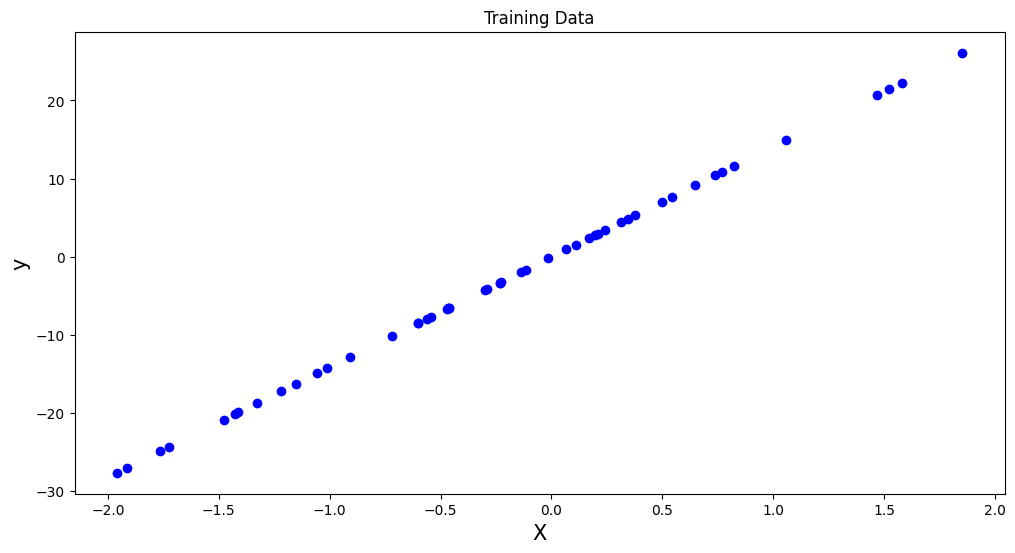

In [51]:
# Visualize data
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='b')
plt.ylabel('y', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.title('Training Data')
plt.show()

#### Convert to torch tensors

In [52]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
X, y

(tensor([[ 0.1969],
         [-1.2208],
         [ 1.5230],
         [-1.4123],
         [ 1.4656],
         [ 0.2420],
         [-0.2341],
         [-0.6017],
         [ 1.8523],
         [ 0.5426],
         [ 0.1109],
         [ 0.3142],
         [-1.3282],
         [-1.9133],
         [-1.7630],
         [ 0.7385],
         [-0.9080],
         [-1.1510],
         [-0.2258],
         [-0.2917],
         [-0.6006],
         [ 0.6477],
         [-1.0577],
         [-0.4606],
         [ 0.0675],
         [-0.5623],
         [-0.1156],
         [-0.1383],
         [-0.4657],
         [-1.9597],
         [ 0.3436],
         [-0.7198],
         [ 0.3757],
         [-0.2342],
         [-0.0135],
         [ 0.2089],
         [ 0.8225],
         [ 0.1714],
         [-1.0128],
         [-0.4634],
         [-0.3011],
         [ 0.7674],
         [ 1.0571],
         [-1.4247],
         [-0.4695],
         [ 1.5792],
         [-0.5444],
         [ 0.4967],
         [-1.4785],
         [-1.7249]])

#### Create neural network model

In [53]:
model = nn.Sequential(
    nn.Linear(1, 1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

#### Visualize computation graph (before training)

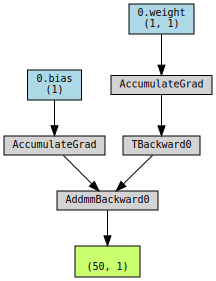

In [56]:
ypred = model(X)
make_dot(ypred, params=dict(model.named_parameters()))

#### Setting Parameters

In [57]:
learningRate = 0.001
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate,)

#### Training Neural Network

In [61]:
epochs = 5000
losses = torch.zeros(epochs)

for epoch in range(epochs):
    # Forward propagation
    ypred = model(X)
    loss = lossfunc(ypred, y)

    # Backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the loss
    losses[epoch] = loss.detach()

    if epoch % 250 == 0:
        print(f'Epoch: {epoch}; Loss: {loss.item():.4f}')

Epoch: 0; Loss: 0.0000
Epoch: 250; Loss: 0.0000
Epoch: 500; Loss: 0.0000
Epoch: 750; Loss: 0.0000
Epoch: 1000; Loss: 0.0000
Epoch: 1250; Loss: 0.0000
Epoch: 1500; Loss: 0.0000
Epoch: 1750; Loss: 0.0000
Epoch: 2000; Loss: 0.0000
Epoch: 2250; Loss: 0.0000
Epoch: 2500; Loss: 0.0000
Epoch: 2750; Loss: 0.0000
Epoch: 3000; Loss: 0.0000
Epoch: 3250; Loss: 0.0000
Epoch: 3500; Loss: 0.0000
Epoch: 3750; Loss: 0.0000
Epoch: 4000; Loss: 0.0000
Epoch: 4250; Loss: 0.0000
Epoch: 4500; Loss: 0.0000
Epoch: 4750; Loss: 0.0000


In [62]:
ypred

tensor([[  2.7741],
        [-17.2044],
        [ 21.4627],
        [-19.9025],
        [ 20.6541],
        [  3.4097],
        [ -3.2996],
        [ -8.4794],
        [ 26.1025],
        [  7.6458],
        [  1.5631],
        [  4.4284],
        [-18.7171],
        [-26.9623],
        [-24.8451],
        [ 10.4065],
        [-12.7961],
        [-16.2200],
        [ -3.1817],
        [ -4.1107],
        [ -8.4643],
        [  9.1273],
        [-14.9055],
        [ -6.4915],
        [  0.9516],
        [ -7.9239],
        [ -1.6298],
        [ -1.9485],
        [ -6.5632],
        [-27.6160],
        [  4.8423],
        [-10.1442],
        [  5.2943],
        [ -3.2998],
        [ -0.1903],
        [  2.9433],
        [ 11.5914],
        [  2.4149],
        [-14.2730],
        [ -6.5306],
        [ -4.2433],
        [ 10.8147],
        [ 14.8971],
        [-20.0778],
        [ -6.6160],
        [ 22.2544],
        [ -7.6716],
        [  6.9997],
        [-20.8356],
        [-24.3079]],

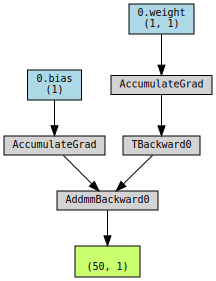

In [63]:
# Visualize computation graph (after training)
make_dot(ypred, params=dict(model.named_parameters()))

#### Loss vs Epoch

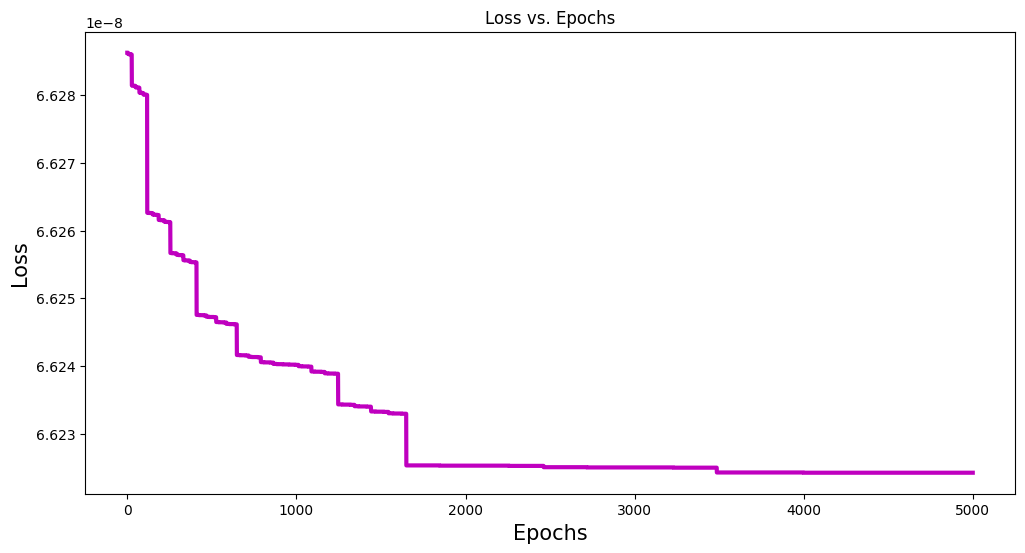

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw=3)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Loss vs. Epochs')
plt.show()

#### Weights and Bias of training model

In [66]:
# We have only 1 layer
print(f"Trained Weight: {model[0].weight.detach().numpy()}")
print(f"Trained Bias: {model[0].bias.detach().numpy()}")

Trained Weight: [[14.092144]]
Trained Bias: [-6.262244e-05]


#### Create test data

In [67]:
test_data = np.linspace(-3, 3, 50).reshape(-1, 1)
X_test = torch.tensor(test_data, dtype=torch.float32)
y_test = model(X_test)

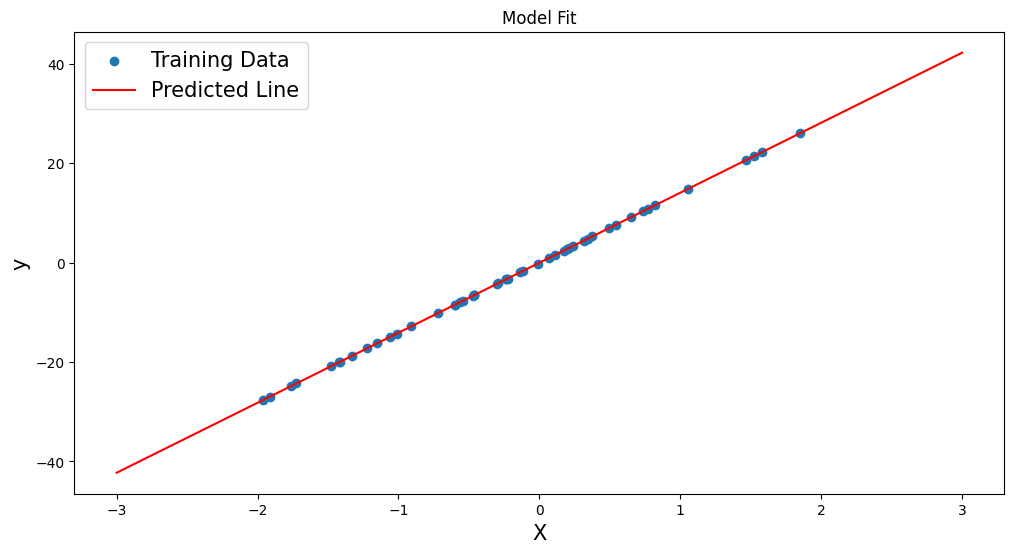

In [68]:
# Plot predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Training Data')
plt.plot(X_test, y_test.detach(), 'r', label='Predicted Line')
plt.legend(fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Model Fit')
plt.show()

#### Performance

In [72]:
from sklearn import metrics
print(f'Training Data RMSE: {np.sqrt(metrics.mean_squared_error(y.detach().numpy(), y_test.detach().numpy())):.4f}')
print(f'Training Data MAE: {metrics.mean_absolute_error(y.detach().numpy(), y_test.detach().numpy()):.4f}')
print(f'Training Data R²: {metrics.r2_score(y.detach().numpy(), y_test.detach().numpy()):.4f}')

Training Data RMSE: 29.0553
Training Data MAE: 22.9576
Training Data R²: -3.9759
